In [28]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns

In [29]:
data = pd.read_csv('Genetic mapping_exercise.csv', header=0)
#file = 'Dataset/Genetic mapping_exercise.xls'
#data = pd.read_excel(file)

# new line to concatenate
#datadp = data.head(1)

# concatenate dataset to reset index
#data = pd.concat([datadp, data], axis=0)

# reset index
#data = data.reset_index()

# remove columns
data = data.drop(columns=['ID','Unnamed: 39','Unnamed: 40','Unnamed: 41'])
#data = data.drop([0])

print(data.shape)
print(list(data.columns))
data

(1517, 38)
['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'Sexo']


,H1,H2,H3,H4,H5,H6,H7,H8,H9,N2,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
0,1,1,1.0,2,1,1,97,61,12,22,...,0,0,0,0,0,0,0,0,0,2.0
1,1,2,1.0,1,1,2,20,32,20,75,...,2,2,1,2,2,1,2,1,1,2.0
2,1,1,1.0,1,0,2,16,35,20,59,...,2,2,2,2,2,2,2,2,2,1.0
3,1,9,1.0,0,2,2,20,26,20,48,...,2,1,2,2,2,2,2,2,2,2.0
4,2,2,1.0,0,1,4,98,25,12,42,...,0,0,0,0,0,0,0,0,0,2.0
5,2,2,1.0,5,0,7,8,59,10,0,...,2,2,2,2,2,2,2,2,2,1.0
6,2,1,1.0,3,1,7,8,46,10,0,...,2,2,2,2,2,2,2,2,2,1.0
7,2,2,1.0,4,0,7,5,99,16,60,...,2,2,2,2,2,2,2,2,2,2.0
8,2,2,1.0,3,2,7,6,57,10,0,...,2,2,2,2,2,2,2,2,2,2.0
9,1,2,1.0,2,1,1,8,64,14,38,...,0,0,0,0,0,0,0,0,0,2.0


In [30]:
# organizar dados
data_pred = data.sort_values(['Sexo'])

# separar os dados 'NaN'
data_pred = data_pred.tail(92)
#data_pred = data_pred.astype('float64')

# drop 'NaN' no dataset para traino e test
data = data.dropna()

# converter dados para binarios
data['Sexo'] = data['Sexo'].map({1.0: 0, 2.0: 1})

# converter os dados para float
data = data.astype('float64')
print(data.shape)
data

(1425, 38)


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,H1,H2,H3,H4,H5,H6,H7,H8,H9,N2,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Sexo
0,1.0,1.0,1.0,2.0,1.0,1.0,97.0,61.0,12.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,1.0,1.0,1.0,2.0,20.0,32.0,20.0,75.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,0.0,2.0,16.0,35.0,20.0,59.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
3,1.0,9.0,1.0,0.0,2.0,2.0,20.0,26.0,20.0,48.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,2.0,2.0,1.0,0.0,1.0,4.0,98.0,25.0,12.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2.0,2.0,1.0,5.0,0.0,7.0,8.0,59.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
6,2.0,1.0,1.0,3.0,1.0,7.0,8.0,46.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
7,2.0,2.0,1.0,4.0,0.0,7.0,5.0,99.0,16.0,60.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
8,2.0,2.0,1.0,3.0,2.0,7.0,6.0,57.0,10.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
9,1.0,2.0,1.0,2.0,1.0,1.0,8.0,64.0,14.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
cols=['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'N2', 'N3', 'N4', 'N5', 'N6',
      'N7', 'N8', 'N9', 'N10', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'C1',
      'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

x=data[cols]
y=data['Sexo']

In [32]:
from sklearn.cross_validation import train_test_split
#Irei preparar o conjunto de treino e teste.
#Deicharemos 200 para teste.
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 400)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
#instanciamos a classe.
#Nada impede de treiná-lo logo em seguida.
 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [34]:
#Aqui armazeno as predições do algoritmo
#No caso aplicamos ele ao conjunto de teste
#Essa variavel servira para fazermos algumas métricas.
predictions = knn.predict(x_test)

In [35]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

0.57

In [36]:
metrics.confusion_matrix(y_test,predictions)

array([[ 72,  96],
       [ 76, 156]])

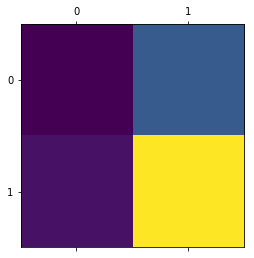

In [37]:
import matplotlib.pyplot as plt
 
cm = metrics.confusion_matrix(y_test,predictions)
plt.matshow(cm)

In [38]:
x_test

,H1,H2,H3,H4,H5,H6,H7,H8,H9,N2,...,G10,C1,C2,C3,C4,C5,C6,C7,C8,C9
295,1.0,1.0,1.0,3.0,1.0,9.0,12.0,39.0,13.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1123,1.0,2.0,1.0,3.0,1.0,3.0,12.0,31.0,13.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,1.0,2.0,1.0,0.0,1.0,0.0,8.0,36.0,16.0,66.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
566,1.0,2.0,1.0,1.0,2.0,1.0,12.0,37.0,12.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2.0,2.0,1.0,1.0,2.0,6.0,8.0,35.0,13.0,0.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
588,1.0,1.0,1.0,2.0,1.0,1.0,12.0,32.0,12.0,26.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1007,1.0,2.0,3.0,2.0,1.0,2.0,97.0,43.0,14.0,42.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
1117,1.0,2.0,1.0,0.0,1.0,4.0,97.0,21.0,10.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
639,1.0,2.0,1.0,3.0,2.0,1.0,97.0,55.0,12.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,2.0,2.0,1.0,5.0,2.0,4.0,8.0,67.0,11.0,30.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [39]:
knn.kneighbors(x_test,n_neighbors=10)

(array([[ 9.2736185 ,  9.2736185 ,  9.38083152, ..., 11.13552873,
         11.22497216, 11.5758369 ],
        [ 7.        ,  7.28010989,  9.38083152, ..., 11.61895004,
         12.08304597, 12.16552506],
        [ 9.11043358, 11.13552873, 12.12435565, ..., 14.28285686,
         14.4222051 , 14.6628783 ],
        ...,
        [ 6.63324958, 11.70469991, 12.24744871, ..., 17.74823935,
         18.13835715, 19.18332609],
        [11.35781669, 12.32882801, 13.78404875, ..., 15.23154621,
         15.3622915 , 15.45962483],
        [ 9.2736185 , 12.40967365, 12.489996  , ..., 29.81610303,
         30.87069808, 30.96772513]]),
 array([[ 201,   60,  464, ...,  515,  661,  894],
        [1017,   16,  389, ...,  906,  811,  877],
        [ 876,  127,  891, ...,  412,  955,  952],
        ...,
        [ 137,   79,  675, ...,  907,  103,  298],
        [ 264,  534,  487, ...,  439,  691,  238],
        [  46,  979,  801, ...,  882,  941, 1016]]))

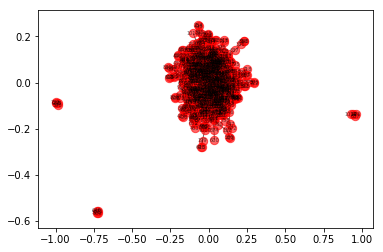

In [40]:
import networkx as nx
 
matrix = knn.kneighbors_graph(x_test,mode='distance',n_neighbors=3)
matrix = matrix.toarray()
 
g = nx.Graph()
 
for x in range(len(matrix)):
    for y in range(len(matrix[x])):
        if matrix[x][y] != 0.0:
            g.add_edge(str(x),str(y),weight=matrix[x][y])
 
nx.draw_networkx(g,alpha=0.6,node_size=70,font_size=5)
plt.show()